<a href="https://colab.research.google.com/github/mehedihasan-cse/Blockchain/blob/main/ML_Coursework_Draft.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [96]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv('/content/COMP1801_Coursework_Dataset_Corrected.csv')

print(df.shape)
df.head()


(1000, 16)


,Lifespan,partType,microstructure,coolingRate,quenchTime,forgeTime,HeatTreatTime,Nickel%,Iron%,Cobalt%,Chromium%,smallDefects,largeDefects,sliverDefects,seedLocation,castType
0,1107.81,Valve,singleGrain,27,2.64,8.08,23.35,60.65,19.76,15.18,4.41,7,0,0,Top,Investment
1,1226.13,Valve,colGrain,24,4.06,1.11,24.98,52.47,31.63,12.32,3.58,30,1,0,Top,Continuous
2,1914.12,Blade,singleGrain,20,4.36,8.54,34.71,60.98,26.56,11.60,0.86,22,0,0,Bottom,Continuous
3,1240.83,Valve,singleGrain,14,3.59,8.83,21.61,54.13,26.71,17.81,1.35,10,0,0,Bottom,Continuous
4,1599.40,Nozzle,singleGrain,22,3.06,3.04,29.65,62.88,24.06,12.08,0.98,21,0,0,Top,Investment


In [97]:
# 2. Basic info
df.info()

# 3. Summary statistics
df.describe()          # numeric features
df.describe(include="object")  # categorical features


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 16 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Lifespan        1000 non-null   float64
 1   partType        1000 non-null   object 
 2   microstructure  1000 non-null   object 
 3   coolingRate     1000 non-null   int64  
 4   quenchTime      1000 non-null   float64
 5   forgeTime       1000 non-null   float64
 6   HeatTreatTime   1000 non-null   float64
 7   Nickel%         1000 non-null   float64
 8   Iron%           1000 non-null   float64
 9   Cobalt%         1000 non-null   float64
 10  Chromium%       1000 non-null   float64
 11  smallDefects    1000 non-null   int64  
 12  largeDefects    1000 non-null   int64  
 13  sliverDefects   1000 non-null   int64  
 14  seedLocation    1000 non-null   object 
 15  castType        1000 non-null   object 
dtypes: float64(8), int64(4), object(4)
memory usage: 125.1+ KB


,partType,microstructure,seedLocation,castType
count,1000,1000,1000,1000
unique,4,3,2,3
top,Nozzle,singleGrain,Top,Investment
freq,268,342,500,335


In [98]:
numeric_cols = df.select_dtypes(include=[np.number]).columns
corr = df[numeric_cols].corr()['Lifespan'].sort_values(ascending=False)
print(corr)


Lifespan         1.000000
Nickel%          0.347533
coolingRate      0.137436
smallDefects     0.113709
Chromium%        0.104553
quenchTime       0.070985
forgeTime        0.009229
largeDefects    -0.011770
Cobalt%         -0.012651
sliverDefects   -0.063549
HeatTreatTime   -0.074326
Iron%           -0.284478
Name: Lifespan, dtype: float64


In [99]:
for col in ["partType", "microstructure", "seedLocation", "castType"]:
    print(f"\nMean Lifespan by {col}:")
    print(df.groupby(col)["Lifespan"].mean().sort_values(ascending=False))



Mean Lifespan by partType:
partType
Block     1350.356210
Nozzle    1306.231642
Blade     1268.525039
Valve     1193.444254
Name: Lifespan, dtype: float64

Mean Lifespan by microstructure:
microstructure
singleGrain    1299.151433
colGrain       1277.332791
equiGrain      1268.330843
Name: Lifespan, dtype: float64

Mean Lifespan by seedLocation:
seedLocation
Bottom    1297.99360
Top       1265.61864
Name: Lifespan, dtype: float64

Mean Lifespan by castType:
castType
Continuous    1319.607701
Investment    1269.159463
Die           1256.270061
Name: Lifespan, dtype: float64


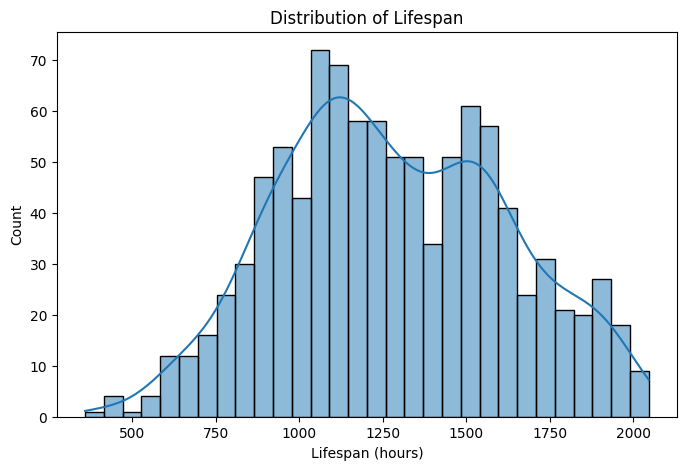

In [100]:
plt.figure(figsize=(8,5))
sns.histplot(df["Lifespan"], kde=True, bins=30)
plt.title("Distribution of Lifespan")
plt.xlabel("Lifespan (hours)")
plt.ylabel("Count")
plt.show()


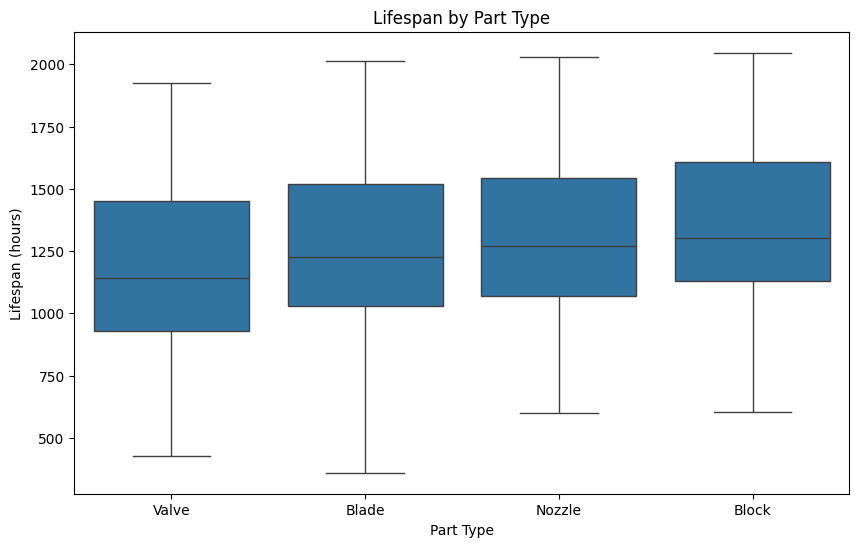

In [101]:
plt.figure(figsize=(10,6))
sns.boxplot(data=df, x="partType", y="Lifespan")
plt.title("Lifespan by Part Type")
plt.xlabel("Part Type")
plt.ylabel("Lifespan (hours)")
plt.show()


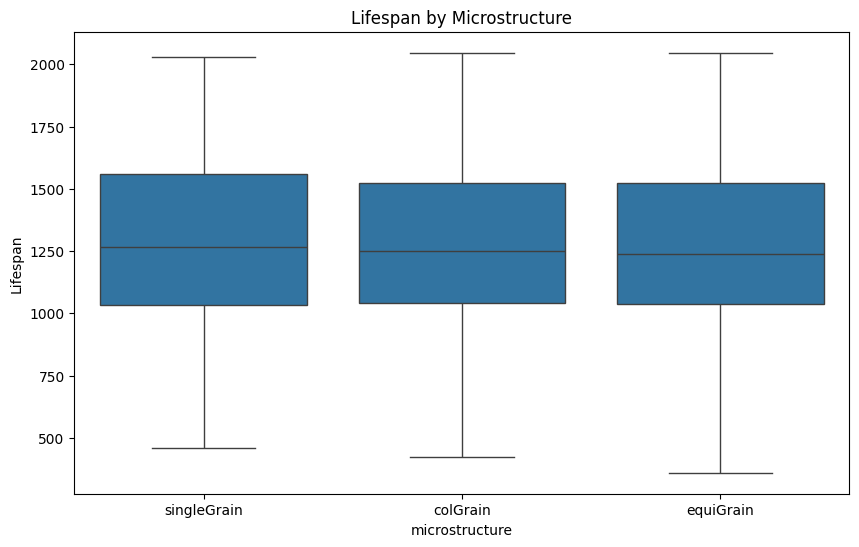

In [102]:
plt.figure(figsize=(10,6))
sns.boxplot(data=df, x="microstructure", y="Lifespan")
plt.title("Lifespan by Microstructure")
plt.show()


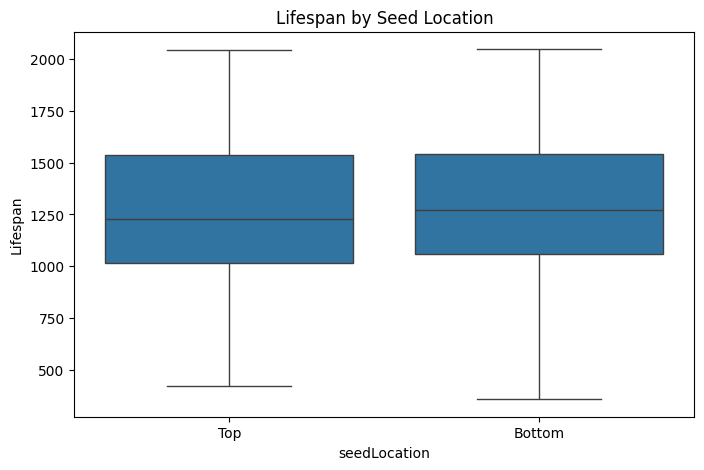

In [103]:
plt.figure(figsize=(8,5))
sns.boxplot(data=df, x="seedLocation", y="Lifespan")
plt.title("Lifespan by Seed Location")
plt.show()


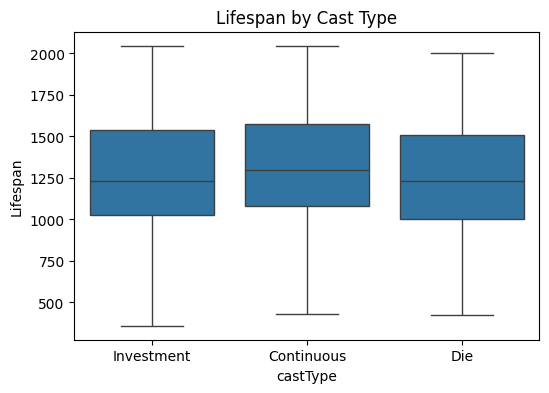

In [104]:
plt.figure(figsize=(6,4))
sns.boxplot(data=df, x="castType", y="Lifespan")
plt.title("Lifespan by Cast Type")
plt.show()


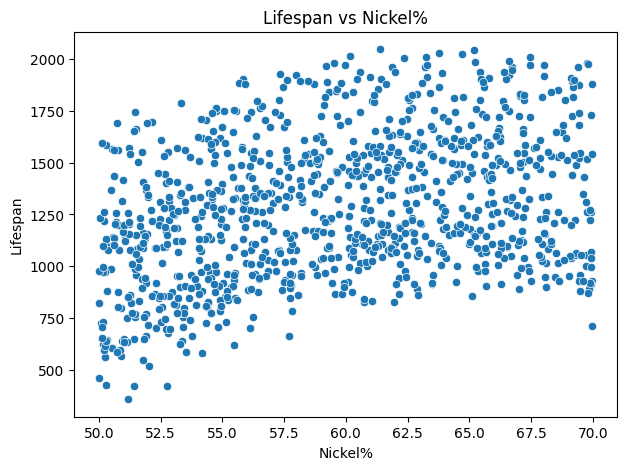

In [105]:
plt.figure(figsize=(7,5))
sns.scatterplot(data=df, x="Nickel%", y="Lifespan")
plt.title("Lifespan vs Nickel%")
plt.show()

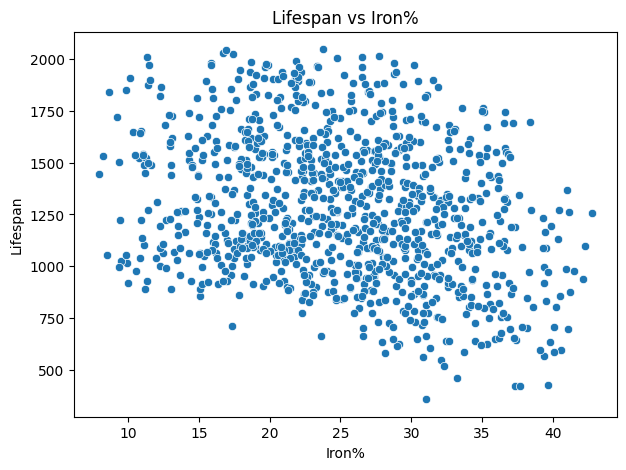

In [106]:
plt.figure(figsize=(7,5))
sns.scatterplot(data=df, x="Iron%", y="Lifespan")
plt.title("Lifespan vs Iron%")
plt.show()


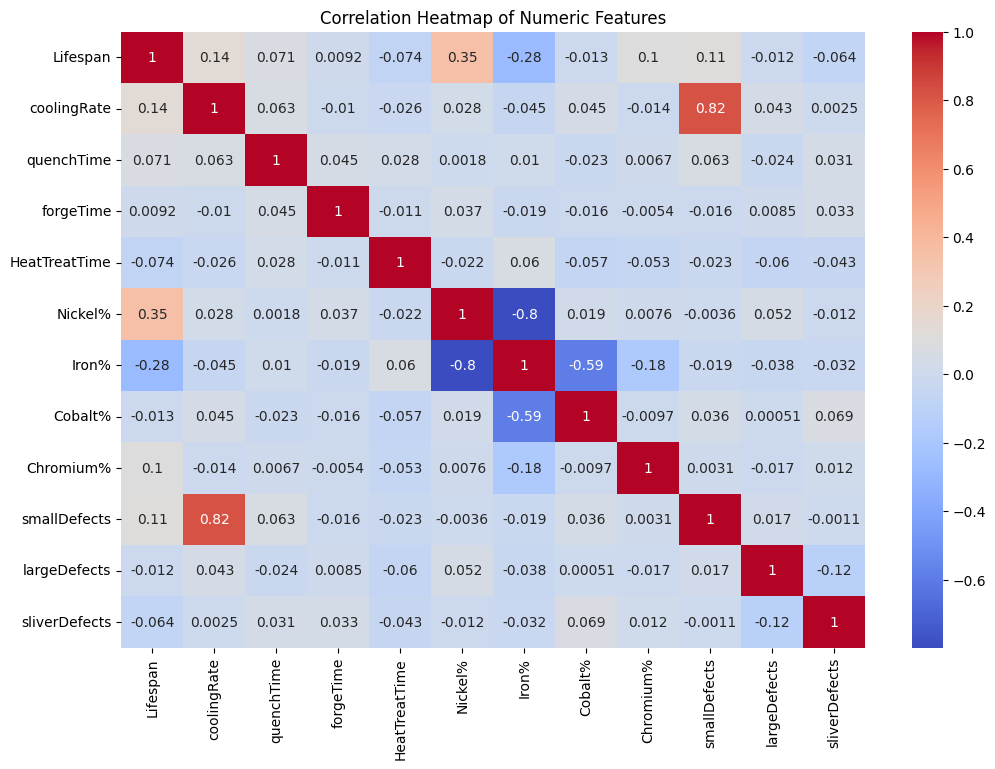

In [107]:
plt.figure(figsize=(12,8))
corr_matrix = df.select_dtypes(include=[np.number]).corr()
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm")
plt.title("Correlation Heatmap of Numeric Features")
plt.show()


In [108]:
import numpy as np
import pandas as pd

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.dummy import DummyRegressor
from sklearn.linear_model import Ridge
from sklearn.ensemble import RandomForestRegressor
from sklearn.neural_network import MLPRegressor

import matplotlib.pyplot as plt

RANDOM_SEED = 42

In [109]:
# Target: Lifespan (continuous)
y = df["Lifespan"]

In [110]:
# Features: all remaining columns
X = df.drop(columns=["Lifespan"])


In [111]:
# Identify numeric and categorical feature lists
categorical_cols = X.select_dtypes(include=["object"]).columns.tolist()
numeric_cols = X.select_dtypes(exclude=["object"]).columns.tolist()

print("Categorical features:", categorical_cols)
print("Numeric features:", numeric_cols)

Categorical features: ['partType', 'microstructure', 'seedLocation', 'castType']
Numeric features: ['coolingRate', 'quenchTime', 'forgeTime', 'HeatTreatTime', 'Nickel%', 'Iron%', 'Cobalt%', 'Chromium%', 'smallDefects', 'largeDefects', 'sliverDefects']


In [112]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=RANDOM_SEED
)

print("Train shape:", X_train.shape)
print("Test shape :", X_test.shape)


Train shape: (800, 15)
Test shape : (200, 15)


In [113]:
# ------------------------------------------------------------
# 3.1.3 Pre-processing: scale numeric, one-hot encode categoricals
# ------------------------------------------------------------
numeric_transformer = StandardScaler()
categorical_transformer = OneHotEncoder(handle_unknown="ignore")

preprocess = ColumnTransformer(
    transformers=[
        ("num", numeric_transformer, numeric_cols),
        ("cat", categorical_transformer, categorical_cols),
    ]
)


In [114]:
# ------------------------------------------------------------
# 3.1.4 Baseline model (mean predictor)
#       (as suggested in the spec for a simple benchmark)
# ------------------------------------------------------------

baseline_model = Pipeline(
    steps=[
        ("preprocess", preprocess),
        ("model", DummyRegressor(strategy="mean")),
    ]
)

baseline_model.fit(X_train, y_train)
y_pred_baseline = baseline_model.predict(X_test)

baseline_rmse = np.sqrt(mean_squared_error(y_test, y_pred_baseline)) # Fixed: removed squared=False and took sqrt
baseline_mae = mean_absolute_error(y_test, y_pred_baseline)
baseline_r2 = r2_score(y_test, y_pred_baseline)

print("\n=== Baseline (DummyRegressor: predicts mean lifespan) ===")
print(f"RMSE: {baseline_rmse:0.2f}")
print(f"MAE : {baseline_mae:0.2f}")
print(f"R^2 : {baseline_r2:0.4f}")


=== Baseline (DummyRegressor: predicts mean lifespan) ===
RMSE: 351.23
MAE : 295.23
R^2 : -0.0375


In [115]:
# ------------------------------------------------------------
# 3.1.5 Model 1 – Ridge Regression (linear, L2-regularised)
# ------------------------------------------------------------

ridge_pipeline = Pipeline(
    steps=[
        ("preprocess", preprocess),
        ("model", Ridge(random_state=RANDOM_SEED)),
    ]
)

ridge_param_grid = {
    "model__alpha": [0.01, 0.1, 1.0, 10.0, 100.0],
    "model__fit_intercept": [True, False],
}

ridge_grid = GridSearchCV(
    estimator=ridge_pipeline,
    param_grid=ridge_param_grid,
    cv=5,
    scoring="neg_root_mean_squared_error",
    n_jobs=-1,
    verbose=1,
)

print("\nFitting Ridge Regression grid search...")
ridge_grid.fit(X_train, y_train)


print("\nBest Ridge parameters:", ridge_grid.best_params_)
print("Best CV RMSE (negative):", ridge_grid.best_score_)

best_ridge = ridge_grid.best_estimator_
y_pred_ridge = best_ridge.predict(X_test)

ridge_rmse = np.sqrt(mean_squared_error(y_test, y_pred_ridge))
ridge_mae = mean_absolute_error(y_test, y_pred_ridge)
ridge_r2 = r2_score(y_test, y_pred_ridge)

print("\n=== Best Ridge Regression on test set ===")
print(f"RMSE: {ridge_rmse:0.2f}")
print(f"MAE : {ridge_mae:0.2f}")
print(f"R^2 : {ridge_r2:0.4f}")



Fitting Ridge Regression grid search...
Fitting 5 folds for each of 10 candidates, totalling 50 fits

Best Ridge parameters: {'model__alpha': 100.0, 'model__fit_intercept': True}
Best CV RMSE (negative): -308.5742717929572

=== Best Ridge Regression on test set ===
RMSE: 315.79
MAE : 271.91
R^2 : 0.1613


In [116]:
# ------------------------------------------------------------
# 3.1.6 Model 2 – MLP Regressor (Neural Network)
# ------------------------------------------------------------

mlp_pipeline = Pipeline(
    steps=[
        ("preprocess", preprocess),
        ("model", MLPRegressor(random_state=RANDOM_SEED, max_iter=300)),
    ]
)

mlp_param_grid = {
    "model__hidden_layer_sizes": [(50,), (50, 50)],
    "model__alpha": [0.0001, 0.001],
    "model__learning_rate_init": [0.001, 0.01],
}

mlp_grid = GridSearchCV(
    estimator=mlp_pipeline,
    param_grid=mlp_param_grid,
    cv=5,
    scoring="neg_root_mean_squared_error",
    n_jobs=-1,
    verbose=1,
)

print("\nFitting MLP Regressor grid search...")
mlp_grid.fit(X_train, y_train)

print("\nBest MLP parameters:", mlp_grid.best_params_)
print("Best CV RMSE (negative):", mlp_grid.best_score_)

best_mlp = mlp_grid.best_estimator_
y_pred_mlp = best_mlp.predict(X_test)

mlp_rmse = np.sqrt(mean_squared_error(y_test, y_pred_mlp))
mlp_mae = mean_absolute_error(y_test, y_pred_mlp)
mlp_r2 = r2_score(y_test, y_pred_mlp)

print("\n=== Best MLP Regressor on test set ===")
print(f"RMSE: {mlp_rmse:0.2f}")
print(f"MAE : {mlp_mae:0.2f}")
print(f"R^2 : {mlp_r2:0.4f}")


Fitting MLP Regressor grid search...
Fitting 5 folds for each of 8 candidates, totalling 40 fits

Best MLP parameters: {'model__alpha': 0.001, 'model__hidden_layer_sizes': (50,), 'model__learning_rate_init': 0.01}
Best CV RMSE (negative): -293.59496843027335

=== Best MLP Regressor on test set ===
RMSE: 237.10
MAE : 196.94
R^2 : 0.5272


/usr/local/lib/python3.12/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(


Model Comparison Table

In [117]:
# Now let's collect all model performances into a clean table.
# This will help us identify the strongest model and is perfect for inclusion in the report.

results_table = pd.DataFrame(
    {
        "Model": ["Baseline", "Ridge Regression", "MLP Regressor"],
        "RMSE": [baseline_rmse, ridge_rmse, mlp_rmse],
        "MAE":  [baseline_mae,  ridge_mae,  mlp_mae],
        "R^2":  [baseline_r2,   ridge_r2,   mlp_r2],
    }
)

print("\n=== Final Regression Model Comparison ===")
results_table.sort_values(by="RMSE")



=== Final Regression Model Comparison ===


,Model,RMSE,MAE,R^2
2,MLP Regressor,237.104415,196.936149,0.527183
1,Ridge Regression,315.786137,271.913385,0.161313
0,Baseline,351.225973,295.233094,-0.037497


True vs Predicted Plot (Best Model)

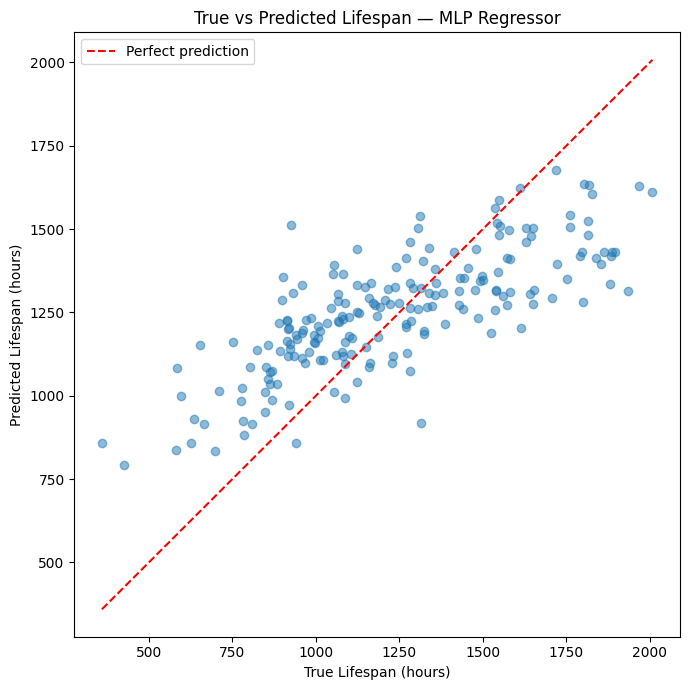

In [118]:

# Let's choose the best model (lowest RMSE) and plot how well it predicted the test set.

best_model_name = results_table.sort_values("RMSE").iloc[0]["Model"]

if best_model_name == "Ridge Regression":
    y_pred_best = y_pred_ridge
elif best_model_name == "MLP Regressor":
    y_pred_best = y_pred_mlp
else:
    y_pred_best = y_pred_baseline

plt.figure(figsize=(7, 7))
plt.scatter(y_test, y_pred_best, alpha=0.5)
plt.plot(
    [y_test.min(), y_test.max()],
    [y_test.min(), y_test.max()],
    "r--", label="Perfect prediction"
)

plt.xlabel("True Lifespan (hours)")
plt.ylabel("Predicted Lifespan (hours)")
plt.title(f"True vs Predicted Lifespan — {best_model_name}")
plt.legend()
plt.tight_layout()
plt.show()


In [125]:
# Extra imports for classification
import seaborn as sns

from sklearn.linear_model import LogisticRegression
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score,
    f1_score, confusion_matrix, ConfusionMatrixDisplay
)
from sklearn.dummy import DummyClassifier
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline


Class counts (0 = <1500, 1 = >=1500):
above_1500
0    711
1    289
Name: count, dtype: int64


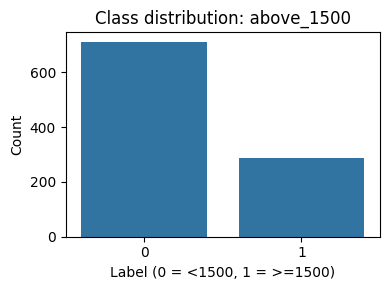

In [131]:
# Binary label: 1 if lifespan >= 1500 hours, else 0
threshold = 1500
df["above_1500"] = (df["Lifespan"] >= threshold).astype(int)

print("Class counts (0 = <1500, 1 = >=1500):")
print(df["above_1500"].value_counts())

# Simple bar plot of class distribution
plt.figure(figsize=(4, 3))
sns.countplot(data=df, x="above_1500")
plt.title("Class distribution: above_1500")
plt.xlabel("Label (0 = <1500, 1 = >=1500)")
plt.ylabel("Count")
plt.tight_layout()
plt.show()


In [133]:
# Features and target for classification
y_cls = df["above_1500"]
X_cls = df.drop(columns=["Lifespan", "above_1500"])

# Numeric / categorical feature lists
numeric_features_cls = X_cls.select_dtypes(include=[np.number]).columns.tolist()
categorical_features_cls = X_cls.select_dtypes(exclude=[np.number]).columns.tolist()

print("Numeric features (classification):", numeric_features_cls)
print("Categorical features (classification):", categorical_features_cls)

# Stratified split to keep class balance
X_train_cls, X_test_cls, y_train_cls, y_test_cls = train_test_split(
    X_cls,
    y_cls,
    test_size=0.2,
    random_state=RANDOM_SEED,
    stratify=y_cls
)

print("Train shape:", X_train_cls.shape, "Test shape:", X_test_cls.shape)


Numeric features (classification): ['coolingRate', 'quenchTime', 'forgeTime', 'HeatTreatTime', 'Nickel%', 'Iron%', 'Cobalt%', 'Chromium%', 'smallDefects', 'largeDefects', 'sliverDefects']
Categorical features (classification): ['partType', 'microstructure', 'seedLocation', 'castType']
Train shape: (800, 15) Test shape: (200, 15)


In [134]:
# Pre-processing: scale numeric and one-hot encode categoricals
numeric_transformer_cls = Pipeline(steps=[
    ("scaler", StandardScaler())
])
categorical_transformer_cls = Pipeline(steps=[
    ("onehot", OneHotEncoder(handle_unknown="ignore"))
])

preprocessor_cls = ColumnTransformer(
    transformers=[
        ("num", numeric_transformer_cls, numeric_features_cls),
        ("cat", categorical_transformer_cls, categorical_features_cls),
    ]
)

print("Classification pre-processing pipeline ready.")


Classification pre-processing pipeline ready.


=== Baseline (majority class) ===
Accuracy : 0.710
Precision: 0.000
Recall   : 0.000
F1-score : 0.000
Confusion matrix:
[[142   0]
 [ 58   0]]



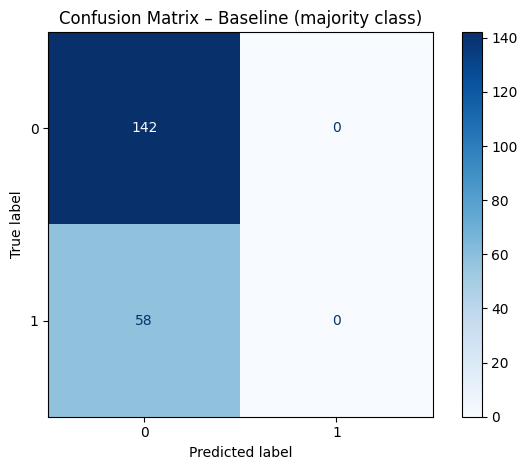

In [135]:
# Helper to compute metrics and show confusion matrix
def evaluate_classification_model(name, y_true, y_pred):
    acc = accuracy_score(y_true, y_pred)
    prec = precision_score(y_true, y_pred, zero_division=0)
    rec = recall_score(y_true, y_pred, zero_division=0)
    f1 = f1_score(y_true, y_pred, zero_division=0)
    cm = confusion_matrix(y_true, y_pred)

    print(f"=== {name} ===")
    print(f"Accuracy : {acc:0.3f}")
    print(f"Precision: {prec:0.3f}")
    print(f"Recall   : {rec:0.3f}")
    print(f"F1-score : {f1:0.3f}")
    print("Confusion matrix:")
    print(cm)
    print()

    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=[0, 1])
    disp.plot(cmap="Blues")
    plt.title(f"Confusion Matrix – {name}")
    plt.tight_layout()
    plt.show()

    return {
        "Model": name,
        "Accuracy": acc,
        "Precision": prec,
        "Recall": rec,
        "F1": f1,
    }

# Store all model results
classification_results = []

# Baseline classifier: always predicts the majority class
baseline_clf = DummyClassifier(strategy="most_frequent")
baseline_clf.fit(X_train_cls, y_train_cls)
y_pred_baseline = baseline_clf.predict(X_test_cls)

baseline_metrics = evaluate_classification_model(
    "Baseline (majority class)", y_test_cls, y_pred_baseline
)
classification_results.append(baseline_metrics)



Fitting Logistic Regression...
Fitting 5 folds for each of 8 candidates, totalling 40 fits

Best Logistic Regression params: {'classifier__C': 0.1, 'classifier__class_weight': 'balanced', 'classifier__penalty': 'l2'}
Best CV F1: 0.4834713457153786
=== Logistic Regression (test) ===
Accuracy : 0.645
Precision: 0.429
Recall   : 0.672
F1-score : 0.523
Confusion matrix:
[[90 52]
 [19 39]]



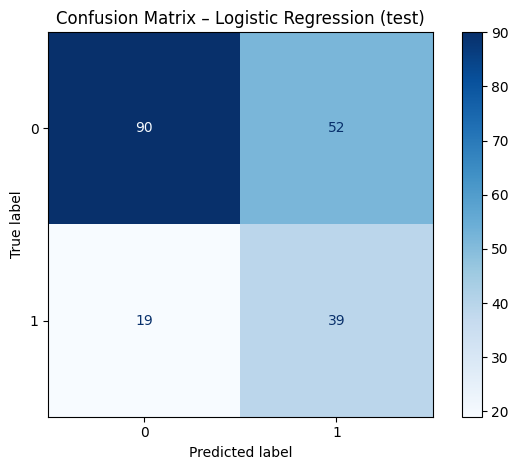

In [137]:
# Logistic Regression with small hyperparameter grid
logreg_pipeline = Pipeline(
    steps=[
        ("preprocess", preprocessor_cls),
        ("classifier", LogisticRegression(max_iter=1000, random_state=RANDOM_SEED))
    ]
)

logreg_param_grid = {
    "classifier__C": [0.01, 0.1, 1.0, 10.0],
    "classifier__penalty": ["l2"],
    "classifier__class_weight": [None, "balanced"],
}

logreg_grid = GridSearchCV(
    estimator=logreg_pipeline,
    param_grid=logreg_param_grid,
    cv=5,
    scoring="f1",   # focus on F1 due to class imbalance
    n_jobs=-1,
    verbose=1,
)

print("\nFitting Logistic Regression...")
logreg_grid.fit(X_train_cls, y_train_cls)

print("\nBest Logistic Regression params:", logreg_grid.best_params_)
print("Best CV F1:", logreg_grid.best_score_)

best_logreg = logreg_grid.best_estimator_
y_pred_logreg = best_logreg.predict(X_test_cls)

logreg_metrics = evaluate_classification_model(
    "Logistic Regression (test)", y_test_cls, y_pred_logreg
)
classification_results.append(logreg_metrics)



Fitting MLPClassifier...
Fitting 5 folds for each of 8 candidates, totalling 40 fits

Best MLPClassifier params: {'classifier__alpha': 0.0001, 'classifier__hidden_layer_sizes': (50, 50), 'classifier__learning_rate_init': 0.001}
Best CV F1: 0.7592146436624654
=== MLPClassifier (test) ===
Accuracy : 0.850
Precision: 0.741
Recall   : 0.741
F1-score : 0.741
Confusion matrix:
[[127  15]
 [ 15  43]]



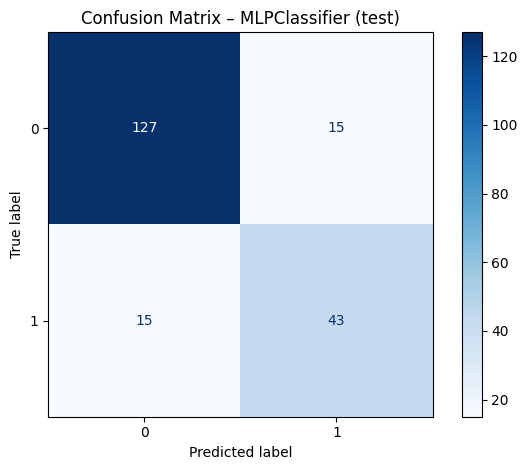

In [145]:
# MLPClassifier (ANN) with small hyperparameter grid
mlpc_pipeline = Pipeline(
    steps=[
        ("preprocess", preprocessor_cls),
        ("classifier", MLPClassifier(random_state=RANDOM_SEED, max_iter=300))
    ]
)

mlpc_param_grid = {
    "classifier__hidden_layer_sizes": [(50,), (50, 50)],
    "classifier__alpha": [0.0001, 0.001],
    "classifier__learning_rate_init": [0.001, 0.01],
}

mlpc_grid = GridSearchCV(
    estimator=mlpc_pipeline,
    param_grid=mlpc_param_grid,
    cv=5,
    scoring="f1",
    n_jobs=-1,
    verbose=1,
)

print("\nFitting MLPClassifier...")
mlpc_grid.fit(X_train_cls, y_train_cls)

print("\nBest MLPClassifier params:", mlpc_grid.best_params_)
print("Best CV F1:", mlpc_grid.best_score_)

best_mlpc = mlpc_grid.best_estimator_
y_pred_mlpc = best_mlpc.predict(X_test_cls)

mlpc_metrics = evaluate_classification_model(
    "MLPClassifier (test)", y_test_cls, y_pred_mlpc
)
classification_results.append(mlpc_metrics)



=== Classification Model Comparison (test set) ===


,Accuracy,Precision,Recall,F1
Model,,,,
MLPClassifier (test),0.850,0.741379,0.741379,0.741379
Logistic Regression (test),0.645,0.428571,0.672414,0.523490
Baseline (majority class),0.710,0.000000,0.000000,0.000000


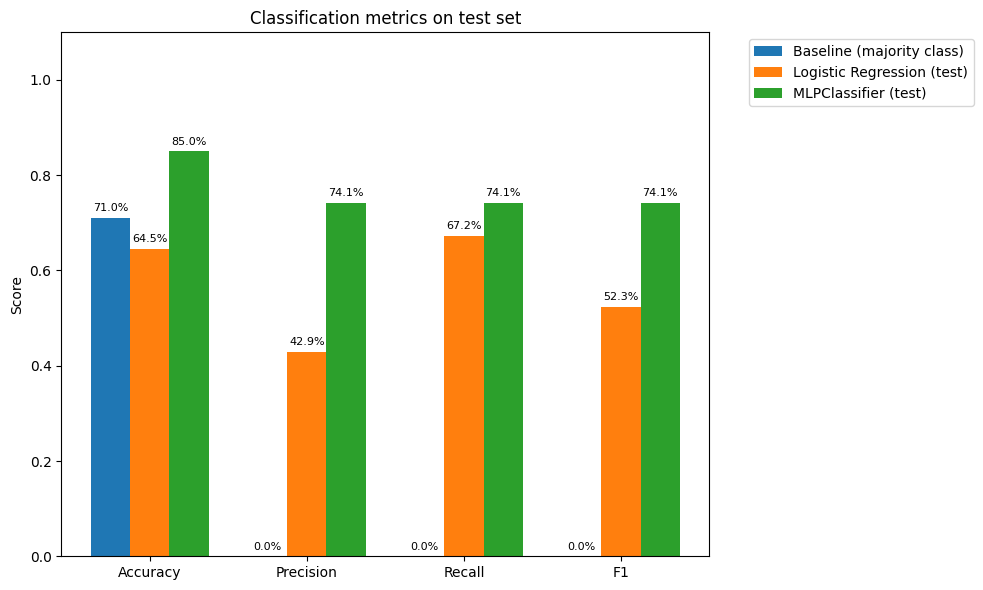

In [149]:
# Summary table of all classification models
cls_results_df = pd.DataFrame(classification_results)
cls_results_df = cls_results_df.drop_duplicates(subset=["Model"]).set_index("Model")

print("\n=== Classification Model Comparison (test set) ===")
display(cls_results_df.sort_values(by="F1", ascending=False))

# Bar plot for Accuracy / Precision / Recall / F1
metrics_names = ["Accuracy", "Precision", "Recall", "F1"]
models = cls_results_df.index.tolist()

x = np.arange(len(metrics_names))
width = 0.25

plt.figure(figsize=(10, 6)) # Increased figure size
ax = plt.gca()

for i, model in enumerate(models):
    scores = cls_results_df.loc[model, metrics_names].values
    bars = ax.bar(x + i*width - width, scores, width, label=model)
    for bar in bars:
        yval = bar.get_height()
        ax.text(bar.get_x() + bar.get_width()/2, yval + 0.01, f'{yval:.1%}', ha='center', va='bottom', color='black', fontsize=8) # Changed position and color

plt.xticks(x, metrics_names)
plt.ylim(0, 1.1) # Adjusted y-limit to accommodate labels if needed, but not strictly for inside labels
plt.ylabel("Score")
plt.title("Classification metrics on test set")
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left') # Legend outside the plot area, in a box
plt.tight_layout()
plt.show()